<a href="https://colab.research.google.com/github/Matheus-Pombeiro/mobile_device_usage/blob/main/mobile_device_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Device Usage**

## Initial settings

In [1]:
# Importing Pandas
import pandas as pd

In [2]:
# Getting the dataset url
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/mobile_device_usage/refs/heads/main/assets/datasets/user_behavior_dataset.csv'

In [3]:
# Reading the dataset
data = pd.read_csv(url).set_index('User ID')
data

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2


## Preferred device model and operating system

In [4]:
# Finding the preferred device model using the mode()
data['Device Model'].mode()

,Device Model
0,Xiaomi Mi 11
1,iPhone 12


In [5]:
# Finding the total of each device
total_of_devices = data['Device Model'].value_counts()
total_of_devices

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


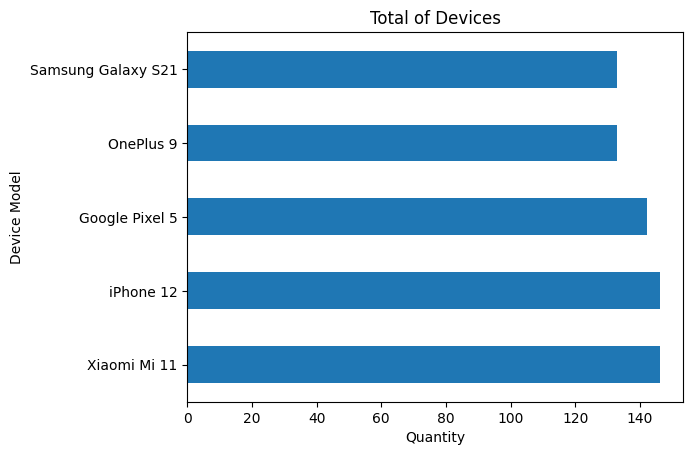

In [6]:
# Plotting the total of devices
total_of_devices.plot(kind='barh', title='Total of Devices', xlabel='Quantity', ylabel='Device Model');

## Number of men and women using mobile devices

In [7]:
# Finding the mode of the 'Gender' column
data['Gender'].mode()

,Gender
0,Male


In [8]:
# Counting the values of each kind of gender (male and female)
gender = data['Gender'].value_counts()
gender

,count
Gender,
Male,364
Female,336


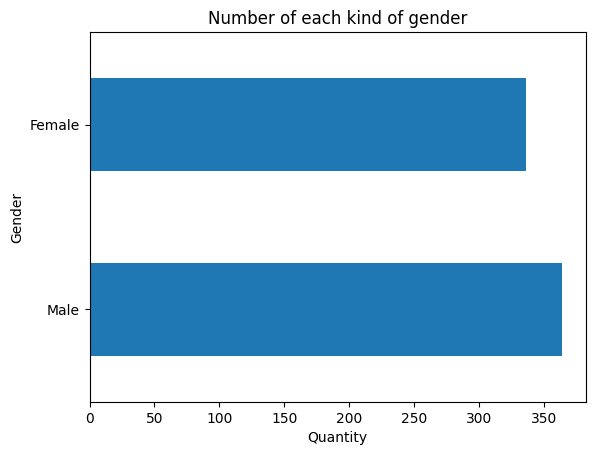

In [9]:
# Plotting the number of each gender
gender.plot(kind='barh', title='Number of each kind of gender', xlabel='Quantity', ylabel='Gender');

## Battery drain (mAh/day) according to the preferred device model

In [10]:
# Grouping device models by batery drain mean
device_models_battery_drain_mean = data.groupby('Device Model')['Battery Drain (mAh/day)'].mean().sort_values()
device_models_battery_drain_mean

,Battery Drain (mAh/day)
Device Model,
Google Pixel 5,1475.676056
Samsung Galaxy S21,1504.571429
OnePlus 9,1523.849624
Xiaomi Mi 11,1528.876712
iPhone 12,1589.513699


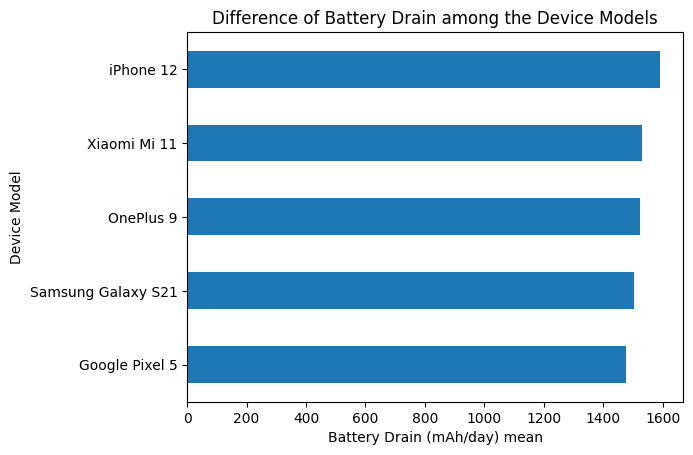

In [11]:
# Plotting the battery drain mean of each device model
device_models_battery_drain_mean.plot(kind='barh', title='Difference of Battery Drain among the Device Models', \
                                      xlabel='Battery Drain (mAh/day) mean', ylabel='Device Model');

In [12]:
# Grouping device models by batery drain standard deviation
device_models_battery_drain_std = data.groupby('Device Model')['Battery Drain (mAh/day)'].std().sort_values()
device_models_battery_drain_std

,Battery Drain (mAh/day)
Device Model,
Google Pixel 5,809.354042
iPhone 12,817.175980
Samsung Galaxy S21,820.700923
Xiaomi Mi 11,821.442490
OnePlus 9,835.151161


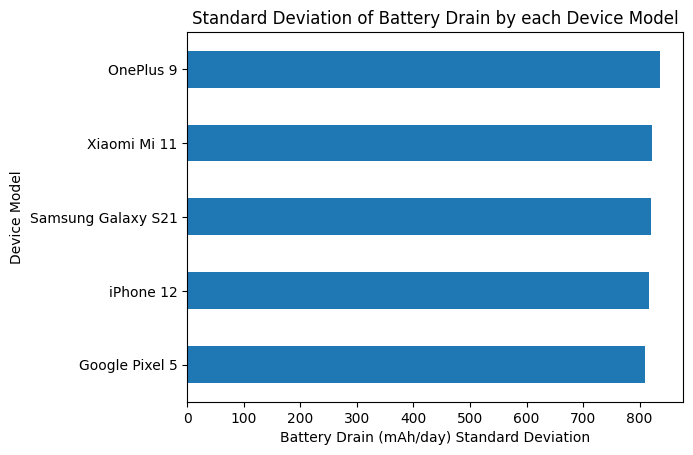

In [13]:
# Plotting the battery drain standard deviation of each device model
device_models_battery_drain_std.plot(kind='barh', title='Standard Deviation of Battery Drain by each Device Model', \
                                     xlabel='Battery Drain (mAh/day) Standard Deviation', ylabel='Device Model');

## Mobile device usage by gender

In [14]:
# Grouping the data by 'Gender' and summing 'Screen On Time (hours/day)' and 'Number of Apps Installed'
mobile_usage_gender = data.groupby('Gender')[['Screen On Time (hours/day)', 'Number of Apps Installed']].sum()
mobile_usage_gender

,Screen On Time (hours/day),Number of Apps Installed
Gender,,
Female,1767.8,16876
Male,1923.1,18601


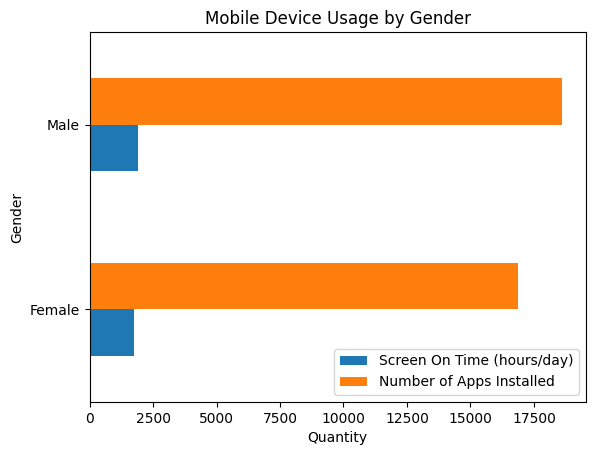

In [15]:
# Plotting the relationship among gender, screen on time and number of apps installed
mobile_usage_gender.plot(kind='barh', title='Mobile Device Usage by Gender', \
                         xlabel='Quantity', ylabel='Gender');

## Relation between data usage and number of apps installed

In [16]:
# Finding the maximum value of data usage
data_usage = pd.DataFrame()
data_usage['Min'] = data[['Data Usage (MB/day)', 'Number of Apps Installed']].min()
data_usage['1st Quartile'] = data[['Data Usage (MB/day)', 'Number of Apps Installed']].quantile(0.25)
data_usage['2nd Quartile'] = data[['Data Usage (MB/day)', 'Number of Apps Installed']].quantile(0.5)
data_usage['3rd Quartile'] = data[['Data Usage (MB/day)', 'Number of Apps Installed']].quantile(0.75)
data_usage['Max'] = data[['Data Usage (MB/day)', 'Number of Apps Installed']].max()
data_usage

,Min,1st Quartile,2nd Quartile,3rd Quartile,Max
Data Usage (MB/day),102,373.0,823.5,1341.0,2497
Number of Apps Installed,10,26.0,49.0,74.0,99


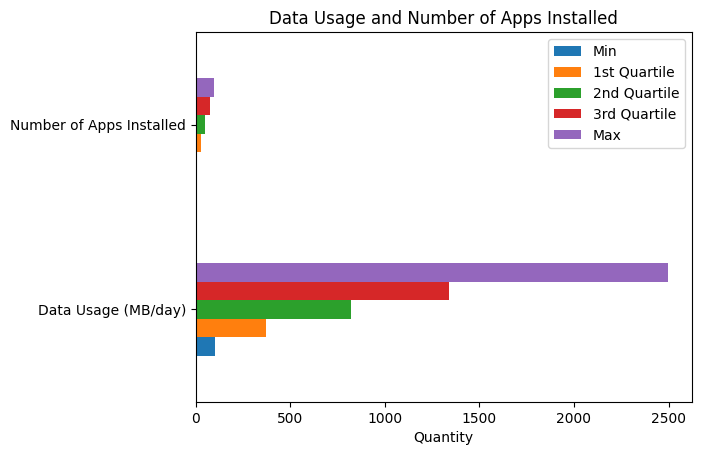

In [17]:
# Plotting the relation between data usage and number of apps installed
data_usage.plot(kind='barh', title='Data Usage and Number of Apps Installed', \
                xlabel='Quantity');

## User age, screen on time and preferred operating system

In [18]:
# Finding the user age mean
data['Age'].mean()

38.48285714285714

In [44]:
# Finding the oldest user
oldest_user_age = data['Age'].max()
oldest_user_age

59

In [43]:
# Finding the screen on time of the oldest user
oldest_user = data.query(f'`Age` == {oldest_user_age}')
oldest_user_median = oldest_user['Screen On Time (hours/day)'].median()
oldest_user_median

5.0

In [47]:
# Finding the youngest user
youngest_user_age = data['Age'].min()
youngest_user_age

18

In [36]:
# Finding the screen on time of the youngest user
youngest_user = data.query(f'`Age` == {youngest_user_age}')
youngest_user_median = youngest_user['Screen On Time (hours/day)'].median()
youngest_user_median

4.0

In [37]:
# Finding the preferred operating system of the oldest users
oldest_user_mode = oldest_user['Operating System'].mode()
oldest_user_mode

,Operating System
0,Android


In [38]:
# Finding the preferred operating system of the youngest users
youngest_user_mode = youngest_user['Operating System'].mode()
youngest_user_mode

,Operating System
0,Android
